In [1]:
lst1 = [5, 12, 19, 26, 33, 40, 47, 54, 61, 68]
lst2 = [3, 9, 15, 21, 27, 33, 39, 45, 51, 57]

for i in lst1:
    if i in lst2:
        print(i)

33


In [4]:
max_len = max(len(lst1),len(lst2))
seen = set()
for i in range(max_len):
    if i < len(lst1):
        seen.add(lst1[i])
    if i < len(lst2):
        seen.add(lst2[i])

In [5]:
seen

{3, 5, 9, 12, 15, 19, 21, 26, 27, 33, 39, 40, 45, 47, 51, 54, 57, 61, 68}

In [14]:
lst3 = lst1+lst2

In [13]:
# Bubble sorting

for i in range(len(lst3)):
    for j in range(len(lst3)-i-1):
        if lst3[j]>lst3[j+1]:
            lst3[j+1],lst3[j] = lst3[j],lst3[j+1]
            #print(lst3)
print(lst3)

[3, 5, 9, 12, 15, 19, 21, 26, 27, 33, 33, 39, 40, 45, 47, 51, 54, 57, 61, 68]


In [15]:
lst3

[5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 3, 9, 15, 21, 27, 33, 39, 45, 51, 57]

In [20]:
# Selection sort

for i in range(len(lst3)):
    min_index = i
    for j in range(i,len(lst3)):
        if lst3[j] < lst3[min_index]:
            min_index = j
    lst3[min_index],lst3[i] = lst3[i],lst3[min_index]

print(lst3)

[3, 5, 9, 12, 15, 19, 21, 26, 27, 33, 33, 39, 40, 45, 47, 51, 54, 57, 61, 68]


In [30]:
# Binary Search - the list should be sorted first
arr = [3, 5, 9, 12, 15, 19, 21, 26, 27, 33, 33, 39, 40, 45, 47, 51, 54, 57, 61, 68]
low,high = 0 ,len(arr)-1
target = 21
while low <=high:
    mid = (low + high) //2

    if target == arr[mid]:
        print(mid)
        break
    elif target < arr[mid]:
        high = mid -1
    else:
        low = mid +1

#print(arr)
print(len(arr))

6
20


In [35]:
# find the k smallest elements in the list
k = 5
arr = [21,2,3,4,23,3,4,2,5,76,89,76,5,43,56,789]

arr.sort(reverse = False)
arr[:5]

[2, 2, 3, 3, 4]

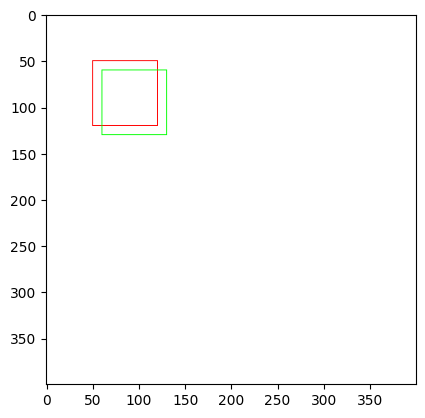

In [31]:
# IoU
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

box1 = (50,50,120,120)
box2 = (60,60,130,130)

image = np.ones((400,400,3), dtype = "uint8") * 255

cv.rectangle(image,(box1[0],box1[1]),(box1[2],box1[3]),(255,0,0),1)
cv.rectangle(image,(box2[0],box2[1]),(box2[2],box2[3]),(0,255,0),1)
plt.imshow(image)

(120, 120)
IoU : 0.5806451612903226


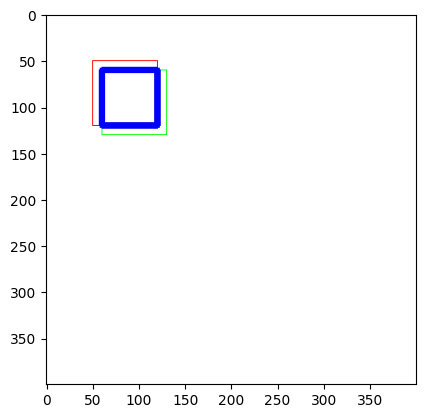

In [33]:


def IoU(box1,box2):
    top_left = (max(box1[0],box2[0]),max(box1[1],box2[1]))
    bottom_right = (min(box1[2],box2[2]),min(box1[3],box2[3]))
    print(bottom_right)

    Area_of_Intersection = (bottom_right[0]-top_left[0])*(bottom_right[1]-top_left[1])
    area_box1 = (box1[2]-box1[0])*(box1[3]-box1[1])

    area_box2 = (box2[2]-box2[0])*(box2[3]-box2[1])

    Area_of_union = area_box1 + area_box2 - Area_of_Intersection
    print("IoU :",Area_of_Intersection/Area_of_union)
    return top_left,bottom_right

top_left,bottom_right = IoU(box1,box2)

cv.rectangle(image,(top_left),(bottom_right),(0,0,255),3)
plt.imshow(image)
plt.show()
cv.destroyAllWindows()



In [11]:
import torch.nn.functional as F

In [30]:
# Attention mechanism using numpy arrays
import numpy as np
import torch

q = torch.rand(1,3,8)

q = q.view(1,3,2,4)
q= q.permute(0,1,3,2)
v = q
k= q
#print(q.shape)
d_k = 8//2
k_transpose = k.transpose(-2,-1)
#print(k_transpose.shape)

attention_scores = q @ k_transpose
scaled_attention_scores = attention_scores/torch.sqrt(torch.tensor(d_k,dtype=torch.float32))

attention_weights = F.softmax(scaled_attention_scores,dim = -1)

attention_weights.shape
v.transpose(-2,-1).shape

output = attention_weights @ v
print(output.shape)
output = output.permute(0,1,3,2)
output = output.reshape(1,3,8)
print(output)
# attention_scores = q.__matmul__(k_transpose)
# scaled_attention_scores = attention_scores/np.sqrt(d_k)
# attention_scores = F.softmax(attention_scores,dim=-1)
# print(attention_scores)

torch.Size([1, 3, 4, 2])
tensor([[[0.4711, 0.4930, 0.4919, 0.4767, 0.6446, 0.6174, 0.6182, 0.6370],
         [0.6523, 0.6871, 0.7387, 0.7307, 0.5381, 0.5832, 0.6728, 0.6644],
         [0.4194, 0.4553, 0.4326, 0.4163, 0.3918, 0.3450, 0.3619, 0.3919]]])


In [54]:
# Tensor operations

a = torch.rand(1,3,8)
print("original tensor ", a)

a.shape
a = a.reshape(1,3,2,4)
print(" Reshaped to 1,3,2,4 ", a)

a = a.transpose(-2,-1)
print("Transpose -2,-1 ",a)

output = a @ a.transpose(-2,-1)
print("matrix multiplication : ",output)

print(output.shape)

softmax_score = F.softmax(output,dim = -1)
print("softmax_score",softmax_score)

softmax_score.shape
print("softmax_score shape",softmax_score.shape)

q = torch.rand(1,3,2,4)
attention_scores = softmax_score @ q.transpose(-2,-1)

print("Attention_scores",attention_scores)

original tensor  tensor([[[0.9781, 0.7064, 0.4657, 0.3839, 0.0721, 0.6172, 0.1204, 0.1347],
         [0.5952, 0.6578, 0.2627, 0.6242, 0.2681, 0.5242, 0.4432, 0.0810],
         [0.0517, 0.1421, 0.8840, 0.7108, 0.2427, 0.0351, 0.5816, 0.7383]]])
 Reshaped to 1,3,2,4  tensor([[[[0.9781, 0.7064, 0.4657, 0.3839],
          [0.0721, 0.6172, 0.1204, 0.1347]],

         [[0.5952, 0.6578, 0.2627, 0.6242],
          [0.2681, 0.5242, 0.4432, 0.0810]],

         [[0.0517, 0.1421, 0.8840, 0.7108],
          [0.2427, 0.0351, 0.5816, 0.7383]]]])
Transpose -2,-1  tensor([[[[0.9781, 0.0721],
          [0.7064, 0.6172],
          [0.4657, 0.1204],
          [0.3839, 0.1347]],

         [[0.5952, 0.2681],
          [0.6578, 0.5242],
          [0.2627, 0.4432],
          [0.6242, 0.0810]],

         [[0.0517, 0.2427],
          [0.1421, 0.0351],
          [0.8840, 0.5816],
          [0.7108, 0.7383]]]])
matrix multiplication :  tensor([[[[0.9619, 0.7354, 0.4642, 0.3852],
          [0.7354, 0.8799, 0.4033,

In [45]:
output @ output.transpose(-2,-1)

tensor([[[[ 2332,  4220,  5708,  1540],
          [ 4220,  7750, 10420,  2870],
          [ 5708, 10420, 14044,  3836],
          [ 1540,  2870,  3836,  1078]],

         [[  428,   245,  1101,  1343],
          [  245,   141,   631,   765],
          [ 1101,   631,  2833,  3451],
          [ 1343,   765,  3451,  4233]],

         [[ 4535,  2808,  4311,  5840],
          [ 2808,  1739,  2665,  3621],
          [ 4311,  2665,  4154,  5487],
          [ 5840,  3621,  5487,  7595]]]])

In [66]:
# numpy computations

a = np.random.rand(1,3,4)
print(a)
a = a.transpose()
print(a.shape)
a = a.transpose(0,2,1)
print(a.shape)

[[[0.11704402 0.91148903 0.0331124  0.1970439 ]
  [0.99860919 0.09278843 0.86831258 0.9848795 ]
  [0.66334431 0.30870948 0.73731135 0.43436151]]]
(4, 3, 1)
(4, 1, 3)


In [69]:
st = np.hstack([a,a])
st

array([[[0.11704402, 0.99860919, 0.66334431],
        [0.11704402, 0.99860919, 0.66334431]],

       [[0.91148903, 0.09278843, 0.30870948],
        [0.91148903, 0.09278843, 0.30870948]],

       [[0.0331124 , 0.86831258, 0.73731135],
        [0.0331124 , 0.86831258, 0.73731135]],

       [[0.1970439 , 0.9848795 , 0.43436151],
        [0.1970439 , 0.9848795 , 0.43436151]]])

In [70]:
st = np.vstack([a,a])
st

array([[[0.11704402, 0.99860919, 0.66334431]],

       [[0.91148903, 0.09278843, 0.30870948]],

       [[0.0331124 , 0.86831258, 0.73731135]],

       [[0.1970439 , 0.9848795 , 0.43436151]],

       [[0.11704402, 0.99860919, 0.66334431]],

       [[0.91148903, 0.09278843, 0.30870948]],

       [[0.0331124 , 0.86831258, 0.73731135]],

       [[0.1970439 , 0.9848795 , 0.43436151]]])

In [88]:
# largest contiguous sum in a list

nums = [-2, 1, -3, 4, -1, 2, 1, -5, 4]

current_sum = 0
start_index = 0
end_index = 2
global_max = 0

for i in range(1,len(nums)):
    
    #print(nums[start_index:end_index])
    current_sum = sum(nums[start_index:end_index])
    #print(current_sum)
    if current_sum<=nums[i]:
        start_index = i
        end_index = i+2
        global_max = max(current_sum,global_max)
    else:
        end_index+=1
        global_max=max(current_sum,global_max)
global_max = max(global_max,sum(nums[start_index:end_index]))
print(global_max)


6


In [90]:
# using Kadane algorithm
nums = [2, 3, -2, 4]
# Expected output: 6 (subarray: [2, 3])
def longest_product(nums):
    current_max = nums[0]
    global_max = nums[0]

    for i in range(1,len(nums)):
        current_max = max(current_max*nums[i],nums[i])
        global_max = max(current_max,global_max)

    return global_max

longest_product(nums)


6

In [22]:
# List comprehension

lst = [[1],[1,2],[1,2,3]]
def flatten_list(lst):
    result = []
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            result.append(lst[i][j])
    return result

flatten_list(lst)




[1, 1, 2, 1, 2, 3]

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

class Backpropagation(nn.Module):
    def __init__(self):
        super(Backpropagation,self).__init__()
        self.linear_1 = nn.Linear(2,10)
        self.linear_2 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.relu(self.linear_1(x))
        x = self.sigmoid(self.linear_2(x))
        return x

x = torch.tensor([[1.0,1.23],[2.12,3.21],[3.65,9.42],[8.22,7.77]])
y = torch.tensor([[1.0],[0.0],[1.0],[0.0]])

model = Backpropagation()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)

epochs = 100

for epoch in range(epochs):
    model.train()
    output = model(x)

    loss = criterion(output,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Testing

with torch.no_grad():
    model.eval()
    output = model(x)
    print(output)



        

tensor([[0.5489],
        [0.5332],
        [0.6700],
        [0.1668]])


In [ ]:
%pip install scikit_learn

In [20]:

from sklearn.datasets import make_classification
import pandas as pd

x,y = make_classification(
    n_classes=10,
    n_features=13,
    n_informative=5,
    n_redundant=2,
    n_samples=1000,
    random_state=42
)
feature_names = [f"feature_{i}" for i in range(x.shape[1])]
data = pd.DataFrame(x,columns = feature_names)

data["target"] = y

print(data.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.419085  -0.524277   0.476253   2.561713   2.412024  -0.813342   
1  -0.877220  -0.818137   0.139041  -2.300790  -2.048621  -0.516195   
2  -0.021345   1.983297   1.284437  -0.149490   2.835748  -0.579037   
3  -0.059226  -0.245850  -0.380072  -1.047704  -2.164244   0.492436   
4  -0.852368  -1.446252   1.987807   2.282875  -0.629572  -0.706482   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   2.305296   1.427952  -2.193423   0.229563    1.522439    0.136592   
1  -1.871853  -1.553647   0.894296   0.006021   -0.316707   -0.458388   
2   2.637723  -0.456497  -1.840523  -0.875360    1.043845   -0.724768   
3  -2.373312  -1.463626   0.279176   1.245914    0.608480   -2.116903   
4  -0.895054   0.426656  -1.817803  -1.851765    2.051574   -1.051531   

   feature_12  target  
0   -1.256119       1  
1   -1.571680       0  
2   -1.885398       2  
3    1.213316       7  
4    0.683480 